<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/bovespa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Após a década de 80 e 90, período no qual houveram diversos avanços tecnológicos e uma maior integração entre os mercados de diferentes países, o estudo e aplicação de técnicas no mercado financeiro se tornou ainda mais evidente.

Neste quesito, utilizar técnicas matemáticas e estatísticas para entender o comportamento do mercado se tornou algo muito comum após o o banco JP Morgan divulgou seu serviço RiskMetrics divulgar o VaR (Value at Risk) que consiste em uma métrica, utilizando estatística, para estimar o máximo de valor que seu ativo poderá perder em um único dia.

Neste contexto, iremos analisar os dados de ação da BOVESPA, a bolsa de valores do Brasil com índices diários dos últimos 3 anos. Com estes dados e seguindo o passo a passo das perguntas abaixo, iremos calcular a maior perda esperada para o meu ativo no dia posterior.

Primeiro, para fazer o download dos dados, utilize o código abaixo para gerar o dataset:

In [260]:
!pip install yfinance -q

# -- Importação de bibliotecas e dados
import pandas as pd
import yfinance as yf

msft = yf.Ticker("BOVA11.SA")

# -- Dataset Histórico
df = msft.history(interval='1d', start='2019-01-01', end='2022-07-28')
df['diff'] = df['Close'] - df['Open']
print(df.shape)
display(df)

(886, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff
Date,,,,,,,,
2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003
2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997
2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003
2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998
2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002
...,...,...,...,...,...,...,...,...
2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001
2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003
2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002


Importando as bibliotecas

In [261]:
import numpy as np
import pandas as pd

import datetime as dt
#bibliotecas para gráficos 2D estáticos
import seaborn as sns
import matplotlib.pyplot as plt
#biblioteca para gráficos interativos, pode fazer em 2D ou 3D
#plotly.express --> fornece funções para visualizar uma variedade de gráficos com vários tipos de dados
import plotly.express as px
import plotly.graph_objects as go

Defina aspectos do tema visual para todos os gráficos matplotlib e seaborn usa-se a sns.set_theme(), pra deixar o aspecto visual mais bonito, pois os gráficos padrão do matplotlib são feios

In [262]:
sns.set_theme(
    context='talk', #deixar os gráficos numa escala com fontes maiores
    style='ticks', #fundo branco
    font_scale= 0.8, #ajuste tamanho da fonte
    rc={
        'figure.figsize': (10,6), #definir o padrão pro tamanho da figura
        'axes.grid': True,
        'grid.alpha':0.2
    }
)

1 - Calcule média, desvio padrão, e a moda da coluna dif?

In [263]:
#calculando a média
df['diff'].mean()

-0.07477434386518148

In [264]:
#calculando desvio padrão
df['diff'].std()

1.1631112620322424

In [265]:
#calculando a moda
df['diff'].mode().values

array([0.])

In [266]:
# ou poderia passar tudo como uma lista usando a função agg(agrega todos os valores e transforma e um só). Porém não pega na moda
df['diff'].agg(['mean','std'])

mean   -0.074774
std     1.163111
Name: diff, dtype: float64

In [267]:
#criar uma função para pegar a moda
def mode(values):
  return pd.Series.mode(values)[0]

mode(df['diff'])

0.0

In [268]:
#mostrando as três 
df['diff'].agg(['mean','std', mode])

mean   -0.074774
std     1.163111
mode    0.000000
Name: diff, dtype: float64

2 - Construa um gráfico de boxplot do dif e responda, qual é (aproximadamente) o valor do outlier mais distante?

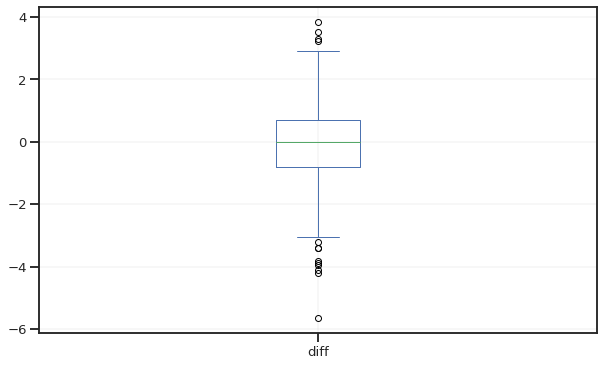

In [269]:
df['diff'].plot.box()
plt.show()

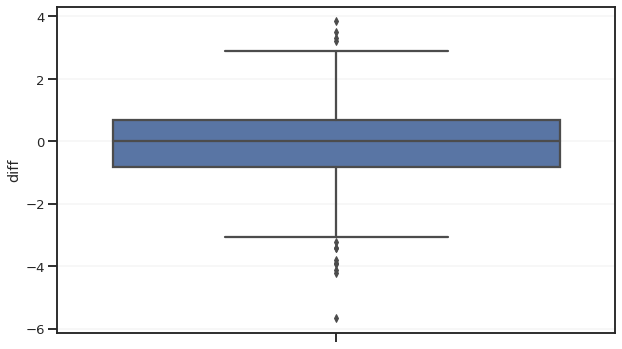

In [270]:
#fazendo usando o seaborn
sns.boxplot(data=df, y='diff')

In [271]:
#usando plotly.express as px
px.box(data_frame=df, y='diff')

3 - Calcule a maior amplitude do dia (High - Low), qual seria a média e variância dessa amplitude para os dados?

In [272]:
df['amplitude'] = df.High  - df.Low # ou posso escrever df['amplitude'] = df['High'] - df['Low']
display(df)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,amplitude
Date,,,,,,,,,
2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003,3.910004
2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997,1.599998
2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003,1.820000
2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998,1.260002
2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002,1.099998
...,...,...,...,...,...,...,...,...,...
2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001,1.909996
2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003,1.340004
2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002,0.900002


In [273]:
#calculando a média e a variância
df['amplitude'].agg(['mean', 'std'])

mean    1.786829
std     1.008223
Name: amplitude, dtype: float64

4 - Utilizando a coluna de data (agrupando por mês e ano) e o dif, qual foi o período com maior saldo negativo? (Entende-se por saldo negativo as somas das diferenças diárias)

In [274]:
df['month'] = df.index.month
df['year'] = df.index.year
display(df)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,amplitude,month,year
Date,,,,,,,,,,,
2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003,3.910004,1,2019
2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997,1.599998,1,2019
2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003,1.820000,1,2019
2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998,1.260002,1,2019
2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002,1.099998,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001,1.909996,7,2022
2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003,1.340004,7,2022
2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002,0.900002,7,2022


In [275]:

#agrupo por mês e ano, pego a coluna diff, somo e ordeno
df.groupby(['month','year'])['diff'].sum().sort_values() 


month  year
3      2020   -14.550003
4      2022   -11.609993
9      2021   -10.220001
6      2022    -8.559990
7      2019    -7.880020
2      2021    -7.270020
8      2020    -6.730011
12     2021    -6.530006
4      2020    -5.389984
9      2020    -5.279976
2      2019    -5.250015
       2020    -4.510033
11     2021    -3.570023
6      2021    -3.530014
10     2021    -3.459999
4      2019    -3.290009
8      2021    -3.220009
7      2021    -3.010002
9      2019    -2.020004
4      2021    -1.930008
6      2019    -1.599983
3      2019    -1.360001
1      2021    -1.029991
8      2019    -0.970016
11     2019    -0.960007
2      2022    -0.300003
5      2020    -0.179993
10     2019     0.140007
       2020     0.519997
3      2022     0.620010
7      2020     1.019989
1      2020     1.449997
6      2020     2.299995
5      2019     2.540016
12     2019     3.259995
5      2022     3.320007
3      2021     4.459999
5      2021     4.989983
7      2022     5.970016
11     2020  

In [276]:
#outra forma de agrupar sem usar o groupby, isso só funciona se o índice for datetime
df.resample('MS')['diff'].sum().sort_values()

Date
2020-03-01 00:00:00-03:00   -14.550003
2022-04-01 00:00:00-03:00   -11.609993
2021-09-01 00:00:00-03:00   -10.220001
2022-06-01 00:00:00-03:00    -8.559990
2019-07-01 00:00:00-03:00    -7.880020
2021-02-01 00:00:00-03:00    -7.270020
2020-08-01 00:00:00-03:00    -6.730011
2021-12-01 00:00:00-03:00    -6.530006
2020-04-01 00:00:00-03:00    -5.389984
2020-09-01 00:00:00-03:00    -5.279976
2019-02-01 00:00:00-02:00    -5.250015
2020-02-01 00:00:00-03:00    -4.510033
2021-11-01 00:00:00-03:00    -3.570023
2021-06-01 00:00:00-03:00    -3.530014
2021-10-01 00:00:00-03:00    -3.459999
2019-04-01 00:00:00-03:00    -3.290009
2021-08-01 00:00:00-03:00    -3.220009
2021-07-01 00:00:00-03:00    -3.010002
2019-09-01 00:00:00-03:00    -2.020004
2021-04-01 00:00:00-03:00    -1.930008
2019-06-01 00:00:00-03:00    -1.599983
2019-03-01 00:00:00-03:00    -1.360001
2021-01-01 00:00:00-03:00    -1.029991
2019-08-01 00:00:00-03:00    -0.970016
2019-11-01 00:00:00-03:00    -0.960007
2022-02-01 00:00:00-

In [277]:
#caso a coluna data não estivesse no índice
df= df.reset_index()
display(df)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,amplitude,month,year
0,2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003,3.910004,1,2019
1,2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997,1.599998,1,2019
2,2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003,1.820000,1,2019
3,2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998,1.260002,1,2019
4,2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002,1.099998,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
881,2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001,1.909996,7,2022
882,2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003,1.340004,7,2022
883,2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002,0.900002,7,2022
884,2022-07-26 00:00:00-03:00,96.879997,97.160004,95.849998,96.150002,4780077,0,0,-0.729996,1.310005,7,2022


In [278]:
# para excluir as colunas month e year, usei def df['month'], idem pra year

#para ecolher qual coluna será o indice: df = df.set_index('Date')

In [279]:
display(df)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,amplitude,month,year
0,2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003,3.910004,1,2019
1,2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997,1.599998,1,2019
2,2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003,1.820000,1,2019
3,2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998,1.260002,1,2019
4,2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002,1.099998,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
881,2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001,1.909996,7,2022
882,2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003,1.340004,7,2022
883,2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002,0.900002,7,2022
884,2022-07-26 00:00:00-03:00,96.879997,97.160004,95.849998,96.150002,4780077,0,0,-0.729996,1.310005,7,2022


In [280]:
#deletando coluna index del df['index']

In [281]:
#encontrando os quartis 1 e 3 e o interquartil(é o valor entre 75% e 25% dos dados, seria a caixa)
values = df['diff']
q1,q3 = np.quantile(values, [0.25,0.75])
iqr = q3 - q1

upper_limit = q3 + 1.5*iqr #no boxplot, esse seria o maior valor, descontando os outliers, seria a reta pra cima
lower_limit = q1 - 1.5*iqr #no boxplot, esse seria o menor valor, descontando os outliers, seria a reta pra baixo



In [282]:
#verificando os outliers
idx = (values>upper_limit) | (values<lower_limit)
values[idx]

0      3.300003
291   -3.209999
293   -5.650002
295   -3.930000
302   -3.800003
303   -4.209999
305    3.840004
499    3.510002
513    3.230003
531   -3.410004
538   -3.410004
665   -4.110001
823   -3.889999
Name: diff, dtype: float64

In [283]:
#pra não ficar solto os códigos acima dos outliers, vou criar uma função pra pegar(get) outliers pelos indices(idx)

In [284]:
def get_outliers_idx(values):
  q1,q3 = np.quantile(values, [0.25,0.75])
  iqr = q3 - q1

  upper_limit = q3 + 1.5*iqr 
  lower_limit = q1 - 1.5*iqr

  return (values>upper_limit) | (values<lower_limit)

values[get_outliers_idx(values)]


0      3.300003
291   -3.209999
293   -5.650002
295   -3.930000
302   -3.800003
303   -4.209999
305    3.840004
499    3.510002
513    3.230003
531   -3.410004
538   -3.410004
665   -4.110001
823   -3.889999
Name: diff, dtype: float64

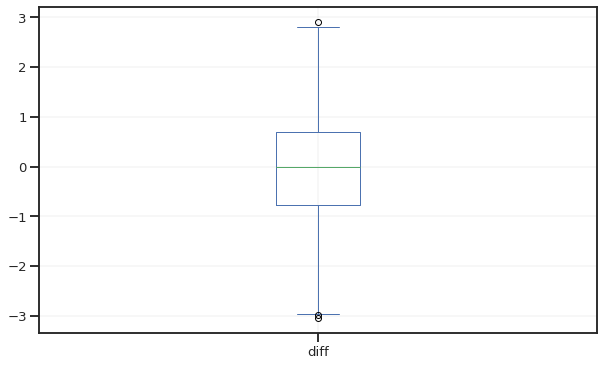

In [285]:
#Se eu quiser dropar(excluir) os outliers basta colocar o ~ e quiser ver no boxplot acrescenta .plot.box()
def get_outliers_idx(values):
  q1,q3 = np.quantile(values, [0.25,0.75])
  iqr = q3 - q1

  upper_limit = q3 + 1.5*iqr 
  lower_limit = q1 - 1.5*iqr

  return (values>upper_limit) | (values<lower_limit)

values[~get_outliers_idx(values)].plot.box() #pegando valores que não são outliers e plotando no boxplot

5 - Calcule os valores de dif do 1,2,3 quartil e os percentis de 25,50 e 75. Compare os resultados o que tem de comum entre eles?

In [286]:
df['diff'].describe()

count    886.000000
mean      -0.074774
std        1.163111
min       -5.650002
25%       -0.809998
50%        0.000000
75%        0.700003
max        3.840004
Name: diff, dtype: float64

In [287]:
#Ou poderia fazer
df['diff'].quantile([0.25,0.5,0.75])

0.25   -0.809998
0.50    0.000000
0.75    0.700003
Name: diff, dtype: float64

In [288]:
#Já para percentil
np.percentile(df['diff'],[25,50,75])

array([-0.80999756,  0.        ,  0.70000267])

In [289]:
#analisa gráficamente pela biblioteca plotly.express as px
px.ecdf(data_frame=df, x='diff')

In [290]:
#para diminuir o tamanho do gráfico usa-se .update_layout(width =800)
px.ecdf(data_frame=df, x='diff').update_layout(width=800)

In [291]:
#pegando 50% dos dados
fig = px.ecdf(data_frame=df, x='diff').update_layout(width=800)
fig.add_hline(0.5)

6 - Construa um histograma das diferenças diárias e insira no mesmo gráfico uma linha informando a média e os valores distantes a 1 e 2 desvios padrõe.

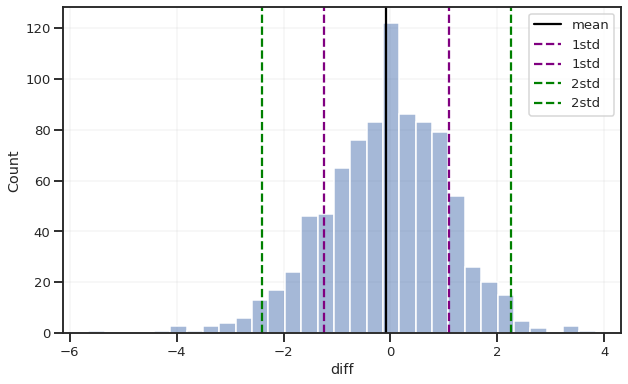

In [292]:
# as diferenças diárias já é a coluna diff.Usando seaborn pra plotar o gráfico em histograma
sns.histplot(data=df, x='diff', alpha=0.5)

#criando uma linha de 50%(média) no eixo x e mundando a cor dessa linha pra preto, colocando uma legenda(legend) e a nome da legenda(label)
plt.axvline(df['diff'].mean(), color='black', label='mean')

#Desvio padrão
mean, std = df['diff'].agg(['mean', 'std'])

#Ajustando o desvio padrão e colocando as linhas deles com relação ao eixo x
plt.axvline(mean+std, color='purple', label='1std', ls='--')
plt.axvline(mean-std, color='purple', label='1std', ls='--')

plt.axvline(mean+2*std, color='green', label='2std', ls='--')
plt.axvline(mean-2*std, color='green', label='2std', ls='--')
plt.legend()
plt.show()

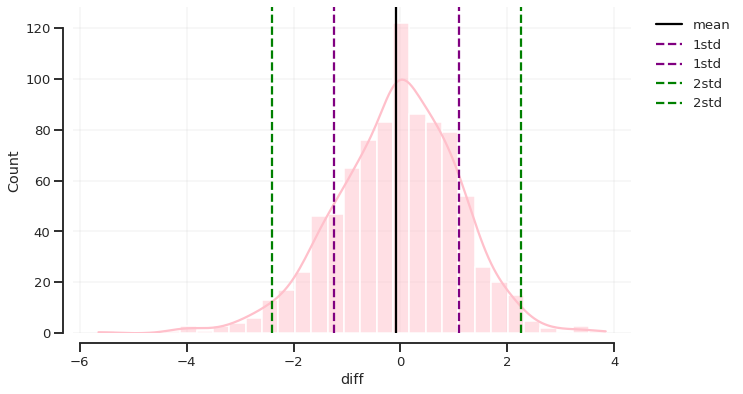

In [293]:
#Se eu quiser mudar um pouco o visual do histograma, é só adiciona: kde = True, color='pink', alpha=0.5
ax = sns.histplot(data=df, x='diff',kde = True, color='pink', alpha=0.5)
#para pegar o tamanho máximo de cada desvio padrão com relação ao eixo y que vai de [0,120] pego o último quando uso [-1]
ylim_max = ax.get_yticks()[-1]
plt.axvline(df['diff'].mean(), color='black', label='mean')


mean, std = df['diff'].agg(['mean', 'std'])

plt.axvline(mean+std, color='purple', label='1std', ls='--')
plt.axvline(mean-std, color='purple', label='1std', ls='--')

plt.axvline(mean+2*std, color='green', label='2std', ls='--')
plt.axvline(mean-2*std, color='green', label='2std', ls='--')
#se eu quiser colocar a legenda pro lado de fora do gráfico(bbox_to_anchor=(1.2,1)) e tirar o quadrado da legenda(frameon=False)
plt.legend(bbox_to_anchor=(1.2,1), frameon=False)
#Despine tira o contorno preto que tava circundando o gráfico e o offset é pra dar um espaço entre as barras do histograma
sns.despine(trim=True, offset=10)
plt.show()

In [294]:
# IMPORTANTE                                                ---Regra Empírica----                                                             # IMPORTANTE     

#Olhar mentoria de estatística descritiva DNC slot 03, no tempo de 0:58hrs aproximadamente 

# Esta regra nas estatísticas sugere que todos os dados que pode observar se enquadrarão em três desvios padrão diferentes da média numa distribuição normal. 
#Poderá também conhecer a regra empírica como a regra 68-95-99.7 ou regra de três sigma. De acordo com a regra, 68% dos dados cairão no primeiro desvio padrão, 
#95% cairão no primeiro e segundo desvio e 99,7% dos dados cairão em todos os três desvios:

#68% – (µ ± σ),
#95% – (µ ± 2σ)
#99,7% – (µ ± 3σ)

7 - Faça um gráfico com os dados de Janeiro à Março de 2022 usando a coluna High e Close. Quantos dias nesse período o ativo fechou com o valor próximo do High (Considere até uma diferença de 0.1 próximo). Calcule esses dias e veja se está parecido com o número que chegou ao analisar o gráfico?

In [295]:
#Se o date estiver no índice posso utilizar a função loc, exemplo df.loc['2019':'2020']
#posso separar por mês também, exemplo df.loc['2019-09':'2020']. Mas antes preciso setar o date pq antes tinha resetado
df = df.set_index('Date')

df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,amplitude,month,year
Date,,,,,,,,,,,
2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003,3.910004,1,2019
2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997,1.599998,1,2019
2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003,1.820000,1,2019
2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998,1.260002,1,2019
2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002,1.099998,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001,1.909996,7,2022
2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003,1.340004,7,2022
2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002,0.900002,7,2022


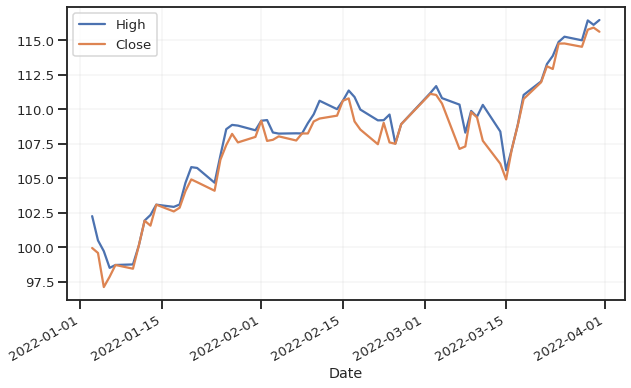

In [296]:
df.loc['2022-01':'2022-03', ['High','Close']].plot()
plt.show()

In [297]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,amplitude,month,year
Date,,,,,,,,,,,
2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003,3.910004,1,2019
2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997,1.599998,1,2019
2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003,1.820000,1,2019
2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998,1.260002,1,2019
2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002,1.099998,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001,1.909996,7,2022
2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003,1.340004,7,2022
2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002,0.900002,7,2022


In [308]:
#Caso a data não esteja no índice, pode-se usar a função between

#df[df.some_date.between(start_date, end_date)]


In [307]:
# Não sei como fazer funcionar, nem a funcionalidade

#df_plot = df.loc['2022-01':'2022-03',['High', 'Close']].reset_index().melt(id_vars='Date')
#px.line(data_frame=df_plot, x='Date', y='valeu', color='variable').update_layout(hovermode='x unified')

In [309]:
#Quantos dias nesse período o ativo fechou com o valor próximo do High (Considere até uma diferença de 0.1 próximo)
(
  df.loc['2022-01':'2022-03',['High','Close']]
  .assign(Diff= lambda x: (x.High-x.Close)<=0.1)
  .Diff.value_counts()
)

False    47
True     15
Name: Diff, dtype: int64

8 - Crie uma coluna que represente o mês dos dados. Em seguida, crie um histograma para cada Mês.

In [311]:
#criando uma coluna mês
df['month'] = df.index.month
display(df)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,diff,amplitude,month,year
Date,,,,,,,,,,,
2019-01-02 00:00:00-02:00,84.599998,88.260002,84.349998,87.900002,5021260,0,0,3.300003,3.910004,1,2019
2019-01-03 00:00:00-02:00,87.550003,88.400002,86.800003,88.000000,4300220,0,0,0.449997,1.599998,1,2019
2019-01-04 00:00:00-02:00,88.199997,89.449997,87.629997,88.500000,2449750,0,0,0.300003,1.820000,1,2019
2019-01-07 00:00:00-02:00,88.650002,89.320000,88.059998,88.480003,2891360,0,0,-0.169998,1.260002,1,2019
2019-01-08 00:00:00-02:00,88.750000,88.970001,87.870003,88.830002,3441770,0,0,0.080002,1.099998,1,2019
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-21 00:00:00-03:00,93.989998,95.529999,93.620003,95.349998,7765854,0,0,1.360001,1.909996,7,2022
2022-07-22 00:00:00-03:00,95.790001,96.160004,94.820000,95.419998,5037163,0,0,-0.370003,1.340004,7,2022
2022-07-25 00:00:00-03:00,96.309998,96.930000,96.029999,96.750000,4192244,0,0,0.440002,0.900002,7,2022


In [315]:
                                                               #Displot
#Ele é usado basicamente para um conjunto univariante(Suscetível de uma só variação) de observações e o visualiza por meio de um histograma, 
#ou seja, apenas uma observação e, portanto, escolhemos uma coluna específica do conjunto de dados.

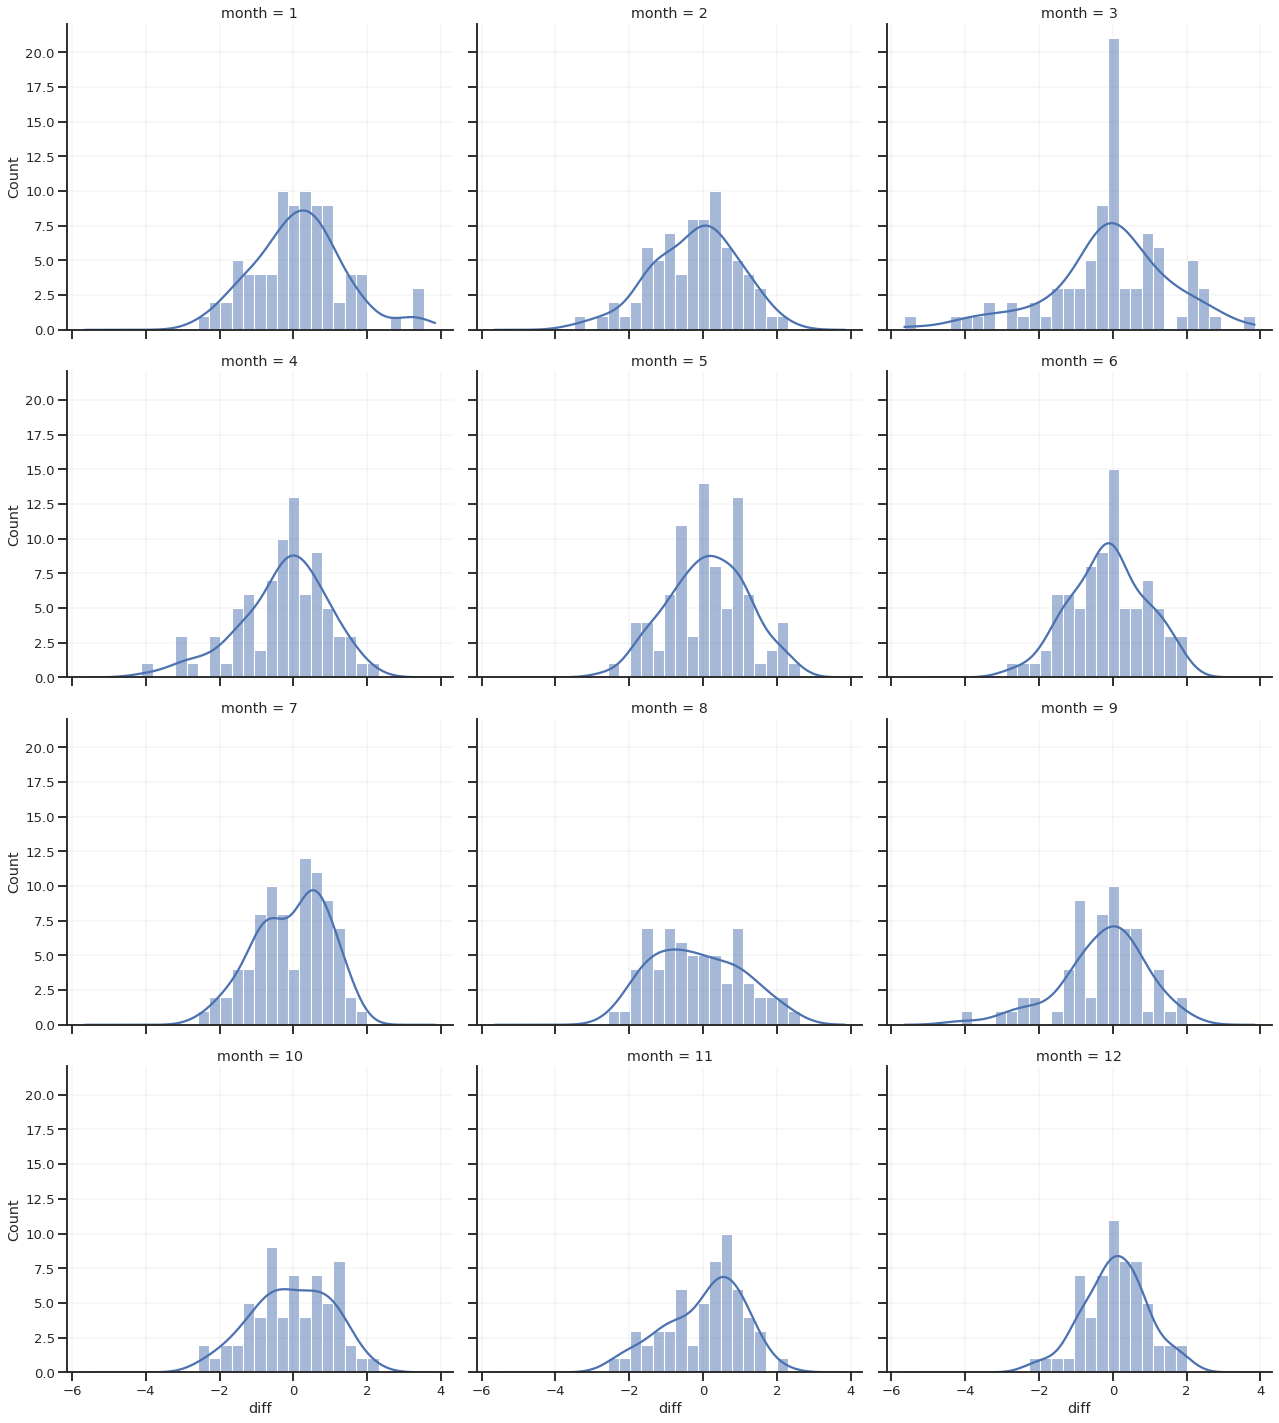

In [314]:
#plotando histograma para cada mês
#col_wrap=3, é pra evitar que fique uma linha com os 12 meses, daí vai quebrando de 3 em 3
#x='diff' é o nome do eixo x
sns.displot(data=df,x='diff', col='month',kde=True, col_wrap=3, aspect=1.2);

In [316]:
#Também posso fazer por plotly.express as px
px.histogram(data_frame=df, x='diff', facet_col='month', facet_col_wrap=3)\
.update_layout(height=800)\
.update_yaxes(matches=None, showticklabels=True)\
.update_xaxes(matches=None, showticklabels=True)